# Processing Flights

This notebook takes a dataset from a file or (Geo)DataFrame and flights which have been dumped to a file (see `demo-export-flights.ipynb`) and procuces a graph of airspace handovers, saving the result to a file.

Ensure you have already dumped some flight data using the aforementioned notebook, and set the data location in `~/.config/flight_processing/flight_processing.conf`.

In [1]:
from flight_processing import DataConfig
from flight_processing.data import GraphBuilder, FlightDownloader

import geopandas
import logging

logger = logging.getLogger()
logger.setLevel(level=logging.INFO)

logging.getLogger('traffic').disabled = True

## Example 1: known dataset from file

This example uses the already encoded bounds of Switzerland and its airspace bounds which have already been saved to a file.

In [2]:
# Initialise
graphbuilder = GraphBuilder("switzerland")

INFO:flight_processing.data.graph_builder:Loading airspace data from /mnt/cold_data/josh/processing/regions_switzerland_wkt.json.
INFO:flight_processing.data.graph_builder:Initialising AirspaceHandler C++ object.
INFO:flight_processing.data.graph_builder:Adding airspace data to AirspaceHandler C++ object.


In [3]:
# Process one hour of flights
graphbuilder.process_flights("2020-01-01 00:00")

INFO:flight_processing.data.graph_builder:Processing downloaded flight data for time 2020-01-01 00:00:00.
INFO:flight_processing.data.graph_builder:Calling AirspaceHandler C++ object to process file at /mnt/cold_data/josh/processing/flights/switzerland/20200101/0000.json.
INFO:flight_processing.data.graph_builder:Retrieving result.
INFO:flight_processing.data.graph_builder:Saving to file(s).
INFO:flight_processing.data.data_utils:Converting graph to sparse matrix.
INFO:flight_processing.data.data_utils:Saving graph as NPZ to /mnt/cold_data/josh/processing/graphs/switzerland/20200101/0000.npz.


In [4]:
# Process 3 hours of flights
graphbuilder.process_flights_bulk("2020-01-01 01:00", "2020-01-01 04:00")

INFO:flight_processing.data.graph_builder:Processing downloaded flights in bulk between 2020-01-01 01:00:00 and 2020-01-01 04:00:00.
INFO:flight_processing.utils:Executing function 3 times between 2020-01-01 01:00:00 and 2020-01-01 04:00:00 with time delta 1:00:00.
INFO:flight_processing.data.graph_builder:Processing downloaded flight data for time 2020-01-01 01:00:00.
INFO:flight_processing.data.graph_builder:Calling AirspaceHandler C++ object to process file at /mnt/cold_data/josh/processing/flights/switzerland/20200101/0100.json.
INFO:flight_processing.data.graph_builder:Retrieving result.
INFO:flight_processing.data.graph_builder:Saving to file(s).
INFO:flight_processing.data.data_utils:Converting graph to sparse matrix.
INFO:flight_processing.data.data_utils:Saving graph as NPZ to /mnt/cold_data/josh/processing/graphs/switzerland/20200101/0100.npz.
INFO:flight_processing.data.graph_builder:Processing downloaded flight data for time 2020-01-01 02:00:00.
INFO:flight_processing.data.

In [5]:
# Cleanup
del graphbuilder

## Example 2: new dataset from (Geo)DataFrame

In this example we directly load a (Geo)DataFrame with the relevant columns rather than relying on already saved files.

Note: in this case we are loading the same dataframe from a file, but the dataframe can be produced within python without the need to save it anywhere beforehand.

We are also using a custom DataConfig as in example 2 of `demo-export-flights.ipynb`.

Note 2: GeoDataFrames require columns `lower_limit`, `upper_limit`, `geometry`, and DataFrames require columns `lower_limit`, `upper_limit`, `wkt`.

In [6]:
dataset = DataConfig("switzerland-custom", minlon=5.3, maxlon=10.7, minlat=45.5, maxlat=48, detail=6)
location = "/mnt/cold_data/josh/processing/regions_switzerland_wkt.json"

In [7]:
gdf = geopandas.read_file(location)
gdf

name  lower_limit  upper_limit  \
0                  A9.1 AIRWAY         9000        19500   
1                  A9.2 AIRWAY        13000        19500   
2    Aiguilles Rouges 300m AGL            0         3300   
3                Alpen Mil off        15000        19500   
4                 Alpen Mil on        13000        19500   
..                         ...          ...          ...   
147         ZURICH 5 TMA 118.1         3500        19500   
148         ZURICH 6 TMA 118.1         5500        19500   
149         ZURICH 7 TMA 118.1         7500        19500   
150         ZURICH 8 TMA 118.1         6500        19500   
151         ZURICH 9 TMA 118.1         7500        19500   

                                                   wkt  \
0    MULTIPOLYGON (((8.982777777777779 47.254166666...   
1    MULTIPOLYGON (((8.94888888888889 47.0338888888...   
2    MULTIPOLYGON (((6.847222222222222 45.931944444...   
3    MULTIPOLYGON (((6.813333333333333 46.372777777...   
4    MULTIPOLYGON (((6.813333333333333 46.372777777...   
..                                                 ...   
147  MULTIPOLYGON (((8.915000000000001 47.491388888...   
148  MULTIPOLYGON (((8.423611111111111 47.779444444...   
149  MULTIPOLYGON (((8.372777777777777 47.305, 8.42...   
150  MULTIPOLYGON (((8 47.64388888888889, 7.9997222...   
151  MULTIPOLYGON (((8.779444444444444 47.864166666...   

                                              geometry  
0    MULTIPOLYGON (((8.98278 47.25417, 8.93194 47.2...  
1    MULTIPOLYGON (((8.94889 47.03389, 8.98278 46.8...  
2    MULTIPOLYGON (((6.84722 45.93194, 6.83028 45.9...  
3    MULTIPOLYGON (((6.81333 46.37278, 7.05083 46.5...  
4    MULTIPOLYGON (((6.81333 46.37278, 7.05083 46.5...  
..                                                 ...  
147  MULTIPOLYGON (((8.91500 47.49139, 8.89806 47.4...  
148  MULTIPOLYGON (((8.42361 47.77944, 8.30500 47.7...  
149  MULTIPOLYGON (((8.37278 47.30500, 8.42361 47.2...  
150  MULTIPOLYGON (((8.00000 47.64389, 7.99972 47.5...  
151  MULTIPOLYGON (((8.77944 47.86417, 8.66083 47.8...  

[152 rows x 5 columns]

In [8]:
graphbuilder = GraphBuilder.from_dataframe(dataset, gdf)

INFO:flight_processing.data.graph_builder:Preprocessing dataframe.
INFO:flight_processing.data.graph_builder:Saving dataframe to temporary file at /tmp/tmpo1fd5b_e.json.
ERROR:fiona._env:/tmp/tmpo1fd5b_e.json: No such file or directory
INFO:flight_processing.data.graph_builder:Instantiating GraphBuilder object.
INFO:flight_processing.data.graph_builder:Loading airspace data from /tmp/tmpo1fd5b_e.json.
INFO:flight_processing.data.graph_builder:Initialising AirspaceHandler C++ object.
INFO:flight_processing.data.graph_builder:Adding airspace data to AirspaceHandler C++ object.
INFO:flight_processing.data.graph_builder:Removing temporary file at /tmp/tmpo1fd5b_e.json.


In [9]:
# Process one hour of flights
graphbuilder.process_flights("2020-03-05 00:00")

INFO:flight_processing.data.graph_builder:Processing downloaded flight data for time 2020-03-05 00:00:00.
INFO:flight_processing.data.graph_builder:Calling AirspaceHandler C++ object to process file at /mnt/cold_data/josh/processing/flights/switzerland-custom/20200305/0000.json.
INFO:flight_processing.data.graph_builder:Retrieving result.
INFO:flight_processing.data.graph_builder:Saving to file(s).
INFO:flight_processing.data.data_utils:Converting graph to sparse matrix.
INFO:flight_processing.data.data_utils:Saving graph as NPZ to /mnt/cold_data/josh/processing/graphs/switzerland-custom/20200305/0000.npz.


In [10]:
# Process 23 hours of flights
graphbuilder.process_flights_bulk("2020-03-05 01:00", "2020-03-06 00:00")

INFO:flight_processing.data.graph_builder:Processing downloaded flights in bulk between 2020-03-05 01:00:00 and 2020-03-06 00:00:00.
INFO:flight_processing.utils:Executing function 23 times between 2020-03-05 01:00:00 and 2020-03-06 00:00:00 with time delta 1:00:00.
INFO:flight_processing.data.graph_builder:Processing downloaded flight data for time 2020-03-05 01:00:00.
INFO:flight_processing.data.graph_builder:Calling AirspaceHandler C++ object to process file at /mnt/cold_data/josh/processing/flights/switzerland-custom/20200305/0100.json.
INFO:flight_processing.data.graph_builder:Retrieving result.
INFO:flight_processing.data.graph_builder:Saving to file(s).
INFO:flight_processing.data.data_utils:Converting graph to sparse matrix.
INFO:flight_processing.data.data_utils:Saving graph as NPZ to /mnt/cold_data/josh/processing/graphs/switzerland-custom/20200305/0100.npz.
INFO:flight_processing.data.graph_builder:Processing downloaded flight data for time 2020-03-05 02:00:00.
INFO:flight_p

INFO:flight_processing.data.graph_builder:Processing downloaded flight data for time 2020-03-05 14:00:00.
INFO:flight_processing.data.graph_builder:Calling AirspaceHandler C++ object to process file at /mnt/cold_data/josh/processing/flights/switzerland-custom/20200305/1400.json.
INFO:flight_processing.data.graph_builder:Retrieving result.
INFO:flight_processing.data.graph_builder:Saving to file(s).
INFO:flight_processing.data.data_utils:Converting graph to sparse matrix.
INFO:flight_processing.data.data_utils:Saving graph as NPZ to /mnt/cold_data/josh/processing/graphs/switzerland-custom/20200305/1400.npz.
INFO:flight_processing.data.graph_builder:Processing downloaded flight data for time 2020-03-05 15:00:00.
INFO:flight_processing.data.graph_builder:Calling AirspaceHandler C++ object to process file at /mnt/cold_data/josh/processing/flights/switzerland-custom/20200305/1500.json.
INFO:flight_processing.data.graph_builder:Retrieving result.
INFO:flight_processing.data.graph_builder:Sav

In [11]:
# Cleanup
del graphbuilder

## Example 3: Process a single flight, plot on map

In this example we load up the dataset as described above, but we download a single flight using `traffic` and process just that flight. We plot this flight, the dataframe, and the airspaces it passes through on a map to verify that the processing works correctly.

We will use the USA dataset here because we have access to more flight data, but this should work for any region.

In [12]:
# Initialise
graphbuilder = GraphBuilder("usa")
downloader = FlightDownloader("usa")

INFO:flight_processing.data.graph_builder:Loading airspace data from /mnt/cold_data/josh/processing/regions_usa_wkt.json.
INFO:flight_processing.data.graph_builder:Initialising AirspaceHandler C++ object.
INFO:flight_processing.data.graph_builder:Adding airspace data to AirspaceHandler C++ object.


In [13]:
# Download some flights
flights = downloader.download_flights("2020-01-01 00:00", "2020-01-01 01:00", limit=2000)
flights

INFO:flight_processing.data.flight_downloader:Downloading flights between 2020-01-01 00:00:00 and 2020-01-01 01:00:00 from OpenSky.
INFO:root:Sending request between time 2020-01-01 00:00:00+00:00 and 2020-01-01 01:00:00+00:00 and hour 2020-01-01 00:00:00+00:00 and 2020-01-01 01:00:00+00:00
INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.6p1)
INFO:paramiko.transport:Authentication (password) successful!
INFO:root:Sending request: select time, icao24, lat, lon, velocity, heading, vertrate, callsign, onground, alert, spi, squawk, baroaltitude, geoaltitude, lastposupdate, lastcontact, hour from state_vectors_data4  where hour>=1577836800.0 and hour<1577840400.0 and time>=1577836800.0 and time<1577840400.0 and lon>=-130 and lon<=-58 and lat>=23 and lat<=46 limit 2000
INFO:root:Reading request in cache /mnt/cold_data/josh/traffic_cache/opensky/21dfcfe680bd06298dd2706f96bcf45f
INFO:numexpr.utils:Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing 

count
icao24 callsign       
a63e46 GJS4571    1572
a90aaa PDT4960     428

INFO:root:Loading @junzis aircraft database


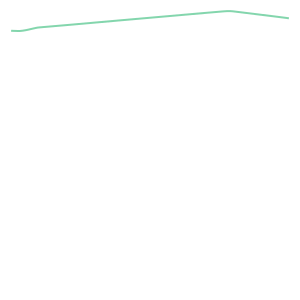

In [14]:
# Isolate one specific flight
flight = flights[0]
flight

In [15]:
handovers = graphbuilder.process_single_flight(flights[0])
len(handovers)

INFO:flight_processing.data.graph_builder:Converting flight to arrays of coordinates.
INFO:flight_processing.data.graph_builder:Processing flight using AirspaceHandler C++ object.


8

In [16]:
regions = set()
for u,v in handovers:
    regions.add(u)
    regions.add(v)

len(regions)

7

INFO:flight_processing.data.graph_builder:Downloading terrain data from Stamen.
INFO:flight_processing.data.graph_builder:Plotting airspace boundaries on map.
INFO:flight_processing.data.graph_builder:Plotting flight(s) on map.
INFO:flight_processing.data.graph_builder:Plotting subset of airspaces on map.


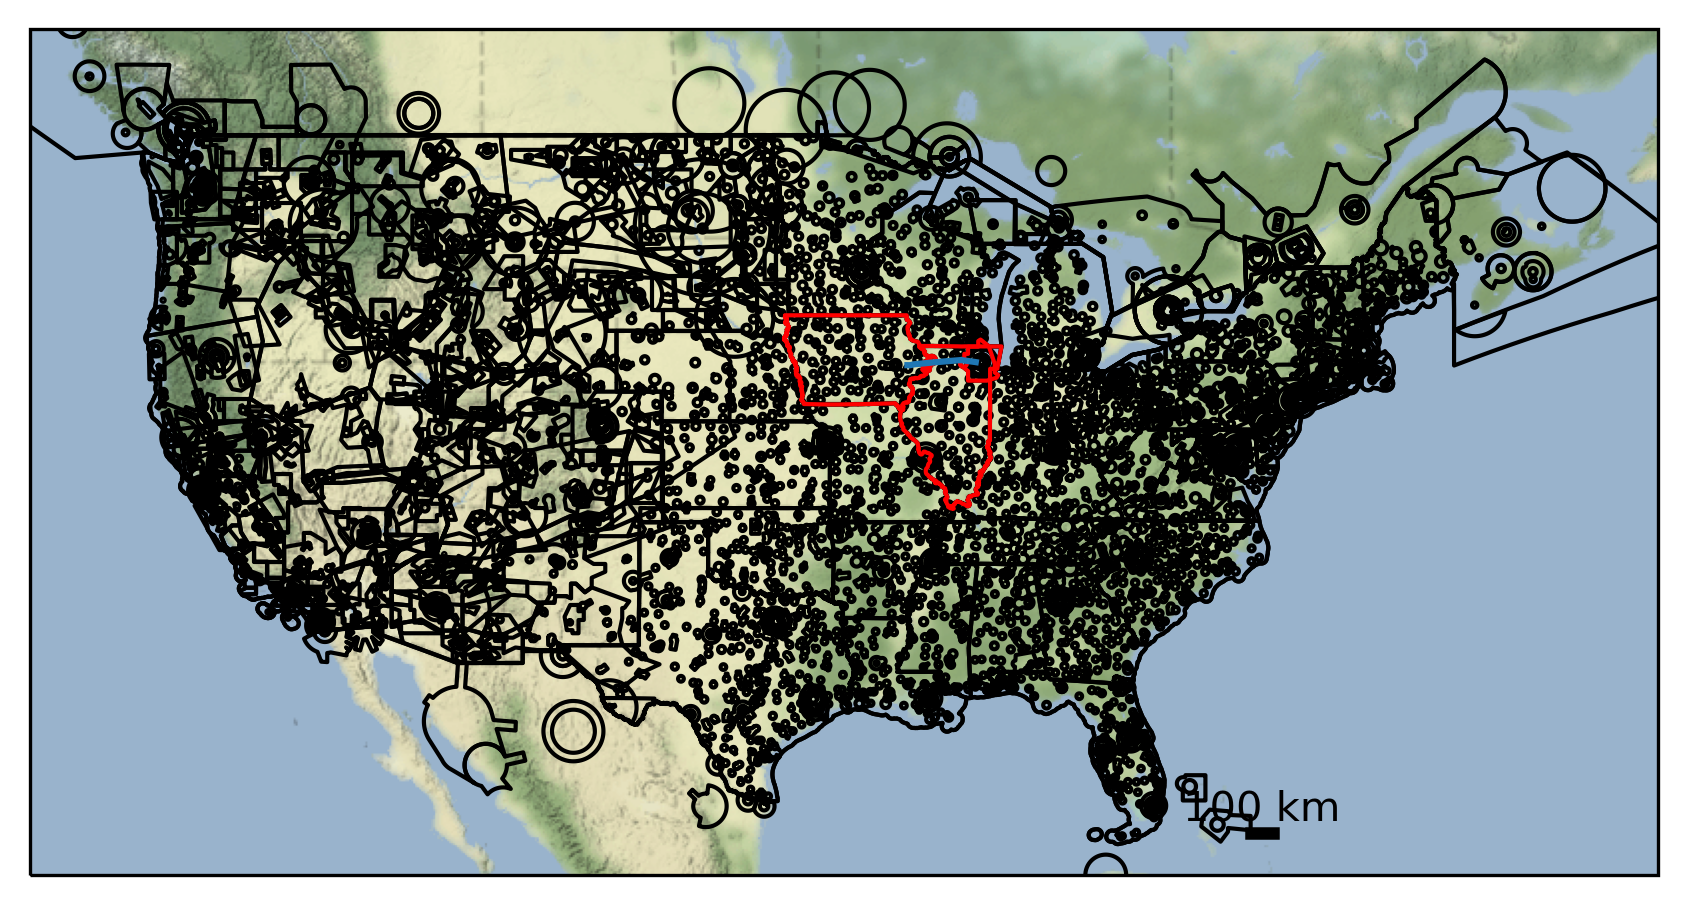

In [17]:
graphbuilder.draw_map(flight=flights[0], subset=regions)

In [18]:
# Cleanup
del graphbuilder
del downloader
del flights